# <center> Multiclass Classification of Images </center>
### Course: Machine Learning (INF267)
### Author: Nampouri Chryssoula - Maria (t8150096)

# Project Description

The purpose of this project is the implementation of Stohastic Gradient Ascent in Python, in order to train a Neural Network with one hidden layer. The data sets that will be used are Mnist and Cifar-10.

In [1]:
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter('error', RuntimeWarning)

# Data Sets

## 1. Mnist data set 

In the data folder there is the data set of mnist. Mnists consists of $28x28$ grayscale images. In total there are 10 training files
train0.txt, train1.txt, ..., train9.txt where each rows of train$k$.txt corresponds to an example that belongs to the class $k$.

The testing data follows the same format.

In total we have $6*10^5$ training examples and $10^3$ testing examples.

In [3]:
def load_mnist_data(dataset):
    
    """ Load the dataset. Reads the training and testing files and creates matrices.
    
    :param dataset: The data set folder 
    :return:
        train_data: the matrix with the training data
        test_data: the matrix with the data that will be used for testing
        y_train: the matrix consisting of one 
            hot vectors on each row (ground truth for training)
        y_test: the matrix consisting of one
            hot vectors on each row (ground truth for testing)    
            
    """
    
    # Load the train files
    df = None
    
    y_train = []

    for i in range( 10 ):
        tmp = pd.read_csv( dataset + 'train%d.txt' % i, header=None, sep=" " )
        # Build labels - one hot vector
        hot_vector = [ 1 if j == i else 0 for j in range(0,10) ]
        
        for j in range( tmp.shape[0] ):
            y_train.append( hot_vector )
        # Concatenate dataframes by rows    
        if i == 0:
            df = tmp
        else:
            df = pd.concat( [df, tmp] )

    train_data = df.as_matrix()
    y_train = np.array( y_train )
    
    # Load test files
    df = None
    
    y_test = []

    for i in range( 10 ):
        tmp = pd.read_csv( dataset + 'test%d.txt' % i, header=None, sep=" " )
        # Build labels - one hot vector
        hot_vector = [ 1 if j == i else 0 for j in range(0,10) ]
        
        for j in range( tmp.shape[0] ):
            y_test.append( hot_vector )
        # Concatenate dataframes by rows    
        if i == 0:
            df = tmp
        else:
            df = pd.concat( [df, tmp] )

    test_data = df.as_matrix()
    y_test = np.array( y_test )
    
    return train_data, test_data, y_train, y_test

## 2. CIFAR-10 data set

In the data folder there is, also the data set of <b> Cifar-10 </b>. The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. Each of these files is a Python "pickled" object produced with cPickle and contains a dictionary with the following elements:

<ul style="list-style-type:disc;">
  <li><b> data: </b> a 10000x3072 numpy array. Each row of the array stores a $32x32$ colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.</li>
  <li><b> labels: </b> a list of 10000 numbers in the range 0-9, indicating the category each example belongs to.</li>

</ul>  

In total we have $5*10^4$ training examples and $10^4$ testing examples.

### Unpickle data set

In [4]:
def unpickle(file):
    
    """ Routine which will open pickled objects and return a dictionary.
    
    :param file: Each batch of the data set
    :return: A dictionary
    
    """
    
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### Load Cifar-10 data set

In [5]:
def load_cifar_data():
    
    """ Load cifar data set and make necessary transformations. 
    
    :return:
        X_train: the matrix with the training data
        X_test: the matrix with the data that will be used for testing
        y_train: the matrix consisting of one 
            hot vectors on each row (ground truth for training)
        y_test: the matrix consisting of one
            hot vectors on each row (ground truth for testing)
            
    """
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    train_tmp = []
    test_tmp = []

    for i in range(1,6):
        batch_dict = unpickle("../datasets/cifar-10-batches-py/data_batch_%d" %i)
        X_train.extend(batch_dict[b"data"])
        train_tmp.extend(batch_dict[b"labels"])
        
    for x in range(len(train_tmp)):
        one =  [ 1 if train_tmp[x] == j else 0 for j in range(0,10) ]
        y_train.append(one)


    batch_dict = unpickle("../datasets/cifar-10-batches-py/test_batch")
    X_test.extend(batch_dict[b"data"])
    test_tmp.extend(batch_dict[b"labels"])
    
    for x in range(len(test_tmp)):
        one =  [ 1 if test_tmp[x] == j else 0 for j in range(0,10) ]
        y_test.append(one)

    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    
    
    return X_train, X_test, y_train, y_test

## Load the desired data set
Select fom standard input if you want to train the Mnist (option 1) or the Cifar-10 (option 2) data set.

In [6]:
while True:
    try:
        # Read integer from stdin
        data_set = int(input("Select 1 of the following numbers based on the desired data set:\n \
                            \n 1: Mnist data set \n 2: Cifar10 data set\n"))
        print("")
        if(data_set in range(1,3)):
            break;
        else:
            raise ValueError('Invalid input. Please select again an integer between 1-2!')
    except ValueError:
        print("")
        print("Invalid input. Please select again an integer between 1-2!")
        print("")
            
# Case1: input = 1
if(data_set == 1):
    print("You selected Mnist data set!")
    X_train, X_test, y_train, y_test = load_mnist_data("../datasets/mnistdata/")
# Case2: input = 2
elif (data_set == 2):
    print("You selected Cifar-10 data set!")
    X_train, X_test, y_train, y_test = load_cifar_data()

Select 1 of the following numbers based on the desired data set:
                             
 1: Mnist data set 
 2: Cifar10 data set
1

You selected Mnist data set!


/home/chryssa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/chryssa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


## Plot Mnist data set 

In [7]:
def plot_mnist():
    
    """ Plot 100 random images from the mnist training set. """
    
    n = 100
    sqrt_n = int( n**0.5 )
    samples = np.random.randint(X_train.shape[0], size=n)

    plt.figure( figsize=(11,11) )

    cnt = 0
    for i in samples:
        cnt += 1
        plt.subplot( sqrt_n, sqrt_n, cnt )
        plt.subplot( sqrt_n, sqrt_n, cnt ).axis('off')
        plt.imshow( X_train[i].reshape(28,28), cmap='gray'  )

    plt.show()

## Plot Cifar-10 data set 

In [8]:
def plot_cifar():
    
    """ Plot 100 random images from the cifar training set. """  
    
    n = 100
    sqrt_n = int( n**0.5 )
    samples = np.random.randint(X_train.shape[0], size=n)

    plt.figure( figsize=(11,11) )

    cnt = 0
    for i in samples:
        arr = X_train[i]
        R = arr[0:1024].reshape(32,32)/255.0
        G = arr[1024:2048].reshape(32,32)/255.0
        B = arr[2048:].reshape(32,32)/255.0

        img = np.dstack((R,G,B))
        cnt += 1
        plt.subplot( sqrt_n, sqrt_n, cnt )
        plt.subplot( sqrt_n, sqrt_n, cnt ).axis('off')
        plt.imshow(img,interpolation='bicubic')

    plt.show()

## View of the selected data set

/home/chryssa/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


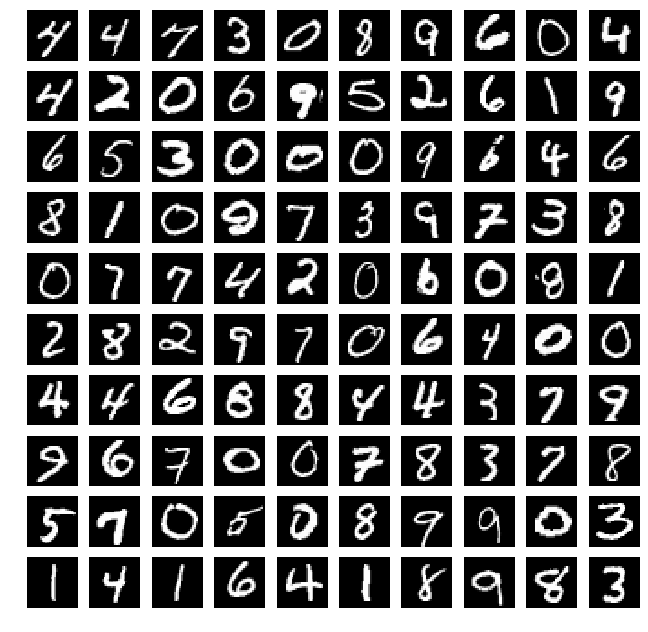

In [9]:
if(data_set == 1):
    plot_mnist()
elif(data_set == 2):
    plot_cifar()

## Normalize the data set 
<br>
Pixel values are integers that range from 0 (black) to 255 (white). So, we divide each feature by the maximum value, in order to normalize our data set in the range [0, 1]. 

In [10]:
# Normalize the data set
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

## Add bias parameter in the data set
<br>

Insert a column of 1's as the first entry in the feature vector --- this is a little trick that allows us to treat
the bias as a trainable parameter within the weight matrix rather than an entirely separate variable.

In [11]:
# Add bias in train and test set
X_train = np.hstack( (np.ones((X_train.shape[0],1) ), X_train) )
X_test = np.hstack( (np.ones((X_test.shape[0],1) ), X_test) )

## Activation Functions
 Using non-linear Activations we are able to generate non-linear mappings from inputs to output and learn something more complex and complicated from data. The below function implements the <b> *Logarithm Activation Function*</b>, the <b> *Tangent Activation Function* </b> and the <b> *Cosine Activation Function* </b> and convert linear output of the current hidden layer of the neural network into non-linear. Then, the non-linear output will be used as input to the next layer. 

<table style="width:100%">
    <tr>
        <th> <center> <font size="3">Activation Function</font></center></th>
        <th> <center><font size="3">Equation</font><center></th>
            <th> <center><font size="3">Derivatives</font></center></th>
    </tr>
    <tr>
        <td><i><b><center><font size="2">logarithm</font></center></b></i></td>
        <td><center><font size="2.85">$Z(a) = \log (1 + e^{a}) $</font></center></td>
        <td><center><font size="2.85">\begin{equation} \frac{\partial Z}{\partial a} = \frac{e^{a}}{1 + e^{a}} \end{equation} </font></center></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tangent</font></center></b></i></td>
        <td><center><font size="2.85">\begin{equation}Z(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}} \end{equation}</font></center></td>
        <td><font size="2.85">\begin{equation}\frac{\partial Z}{\partial a} = 1 - Z^2(a) \end{equation}</font></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cosine</font></center></b></i></td>
        <td><center><font size="2.85">\begin{equation}Z(a) = \cos a \end{equation}</font><center></td>
            <td><center><font size="2.85">\begin{equation} \frac{\partial Z}{\partial a} = -\sin a \end{equation}</font></center></td>
    </tr>
</table>


In [12]:
def activations(activation, a, ax=1):
    
    """ Calculates the non-linear output of the current layer and the derivative of the activation function used.
    
    :param activation: The chosen non-linear activation function
    :param a: The N x (M+1) matrix with the linear output of the current layer
    :return: 
        z: N x (M+1) matrix with the non-linear output of the current layer and
        grad_z: N x (M+1) matrix with the derivatives of the activation function
        
    """
    
    # Case1: logarithm activation function
    if(activation == "log"):
        z = np.logaddexp(0.0, a)
        grad_z = np.exp(a)/(1 + np.exp(a))   
    # Case2: tangent activation function
    elif(activation == "tan"):
        z = (np.exp(a) - np.exp(-a))/(np.exp(a) + np.exp(-a))
        grad_z = np.ones(z.shape) - (z**2)
    # Case3: cosine activation function
    elif(activation == "cos"):
        z = np.cos(a)
        grad_z = -np.sin(a)
        
    return z, grad_z

## Softmax Fuction


The softmax function is defined as: 

\begin{equation}
S_{nk} = \frac{e^{{y_{nk}-m}}}{\sum_{k=1}^K e^{{y_{nk}-m}}}
\end{equation}

In [13]:
def softmax(y, ax=1):
    
    """ Implements Softmax function and turns output numbers from logits layer into probabilities that sum to one.
    
    :param y: The N x K matrix with the linear output of the last hidden layer
    :param ax=1: use by default, when the array id 2D
    :return: 
        s: The N x K matrix with the probabilities of each train example n belong to each category 
        
    """
    
    # Find maximum elemeny per row
    m = np.max(y, axis=ax, keepdims=True)
    # Implement softmax function
    # Subtract the maximum element so as to avoid overflow
    p = np.exp(y - m)
    s = (p / np.sum(p,axis=ax, keepdims=True))
    
    return s

# The Model
A Neural Network with one hidden layer, which classifies each example in one out of ten categories.

<img src="../nn.png">

#  Feed Forward - Cost Function

The cost function (logLikelihood plus reguralization term) we want to maximize for the problem of classifying N number of data in K categories/classes is:

$$
E(W) = \sum_{n=1}^N \sum_{k=1}^K t_{nk} \log s_{nk}   -  \frac{\lambda}{2} \left[ \left( \sum_{k=1}^K ||\mathbf{w_k^{(2)}}||^2 \right) + \left( \sum_{j=1}^M ||\mathbf{w_j^{(1)}}||^2 \right) \right], 
$$

where $s_{nk}$ is the softmax function defined as:

$$\mathbf s_{nk} = \frac{\mathbf{e^{y_{nk}}}}{\sum_{j=1}^K \mathbf{e^{y_{nk}}}},$$

where $ y_{nk}$ is the linear combination of the parameters in the hidden layer defined as:


<br>
 $$\mathbf y_{nk} = \mathbf{z}_n \mathbf{({w}_k^{(2)})}^T $$
 <br>


where $z_{n}$ is the output of the selected activation function in the input layer defined as:

$$\mathbf z_{n}{(a)}, \hspace{3mm}  a = \mathbf x_{n} {(\mathbf{w_{j}}^{(1)})}^T,$$



$ \mathbf{W^{(2)}}$ is a $K \times (M+1)$ matrix, where each line represents the vector $\mathbf{{w}_k}^{(2)}$, <br>
$\mathbf {W^{(1)}}$ is a $(M+1) \times (D+1)$ matrix, where each line represents the vector $\mathbf{{w}_j}^{(1)}$.



The cost function can be simplified in the following form:



$$
E(W) = \sum_{n=1}^N \left[ \left( \sum_{k=1}^K t_{nk} {(\mathbf{z}_n \mathbf{({w}_k^{(2)})}^T)} \right) - \log \left( \sum_{j=1}^K e^{\mathbf{z}_n \mathbf{({w}_j^{(2)})}^T} \right) \right]   -  \frac{\lambda}{2} \left[ \left( \sum_{k=1}^K ||\mathbf{w_k^{(2)}}||^2 \right) + \left( \sum_{j=1}^M ||\mathbf{w_j^{(1)}}||^2 \right) \right], 
$$



In the above formula we have used the fact that $\sum_{k=1}^K t_{nk} = 1$. 


We use the logsumexp trick, where m is the maximum element:
\begin{align} 
\log \sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{z}_n} &= \log \Bigr( \sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{z}_n +m -m}\Bigl) \\ 
&= \log \Bigr( \sum_{j=1}^{K} e^m e^{\mathbf{w}_j^T \mathbf{z}_n-m}  \Bigl) \\ 
&= \log \Bigr( e^m \sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{z}_n-m}  \Bigl) \\ 
&= \log \ e^m + \log \Bigr( \sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{z}_n-m}  \Bigl) \\ 
&= m + \log \Bigr( \sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{z}_n-m}  \Bigl) 
\end{align}

# Partial Derivatives of $\mathbf{w^{(1)}}$ & $\mathbf{w^{(2)}}$ Values
The $\mathbf{w^{(2)}}$ and $\mathbf{w^{(1)}}$ values arise from the following variables of the Cost Function: <br>
<br>
$\mathbf{w^{(2)}} : \hspace{2mm} s_{nk}  \Longrightarrow  {y}_{nk} \Longrightarrow {w}_k^{(2)}$ and the Regularization Term & <br>
$\mathbf{w^{(1)}} : \hspace{2mm} s_{nk} \Longrightarrow y_{nk} \Longrightarrow z_{n} \Longrightarrow a \Longrightarrow{w}_j^{(1)}$ and the correspoding Regularization Term

<b>So, the partial derrivatives of the values $\mathbf{W^{(2)}}$ of the Cost Function are given by the following equation: </b>

\begin{equation} \frac{\partial E}{\partial{W^{(2)}}} = \frac{\partial E}{\partial S} \hspace{3mm}  \frac{\partial S}{\partial Y} \hspace{3mm} \frac{\partial Y}{\partial W^{(2)}}, \end{equation}

where \begin{equation} \frac{\partial E}{\partial Y}  = (T - S)^T, \hspace{2mm} \text{a }\hspace{1mm}K \times N\text{ matrix } \end{equation} 
<center>&</center>
\begin{equation} \frac{\partial Y}{\partial W^{(2)}} = Z, \hspace{2mm}\text{a }\hspace{1mm} N \times (M+1)\text{ matrix} \end{equation}
<br>
<b>
&#x27a4; So, the final result for $\mathbf{W^{(2)}}$ is a
$\textbf{K} \times \textbf{(M+1)}$ matrix as follows: </b>
 $$ 
\textbf{(T - S)}^\textbf{Τ} \times \textbf{Z}
$$

where $T$ is a $N \times K$ matrix with the truth values of the training data, such that $[T]_{nk} = t_{nk}$, $S$ is the corresponding $N \times K$ matrix that holds the softmax probabilities and $Z$ is the $N \times (M + 1)$ matrix that holds the output of the activation function in the input layer.
<br>
<br>

<b>As for $W^{\textbf{(1)}}$, the partial derrivatives of these values are given by the following equation: </b>

\begin{equation} \frac{\partial E}{\partial W^{(1)}} = \frac{\partial E}{\partial S} \hspace{3mm}  \frac{\partial S}{\partial Y} \hspace{3mm} \frac{\partial Y}{\partial Z} * \frac{\partial Z}{\partial A} \hspace{3mm}  \frac{\partial A}{\partial W^{(1)}},   \end{equation}

where \begin{equation} \frac{\partial E}{\partial Y}  = (T - S), \hspace{2mm} \text{a }\hspace{1mm}N \times K\hspace{1mm}\text{matrix}\text{,}\end{equation}
<br>
\begin{equation} \frac{\partial Y}{\partial Z} = W^{(2)}, \hspace{2mm}\text{a }\hspace{1mm} K \times 
(M+1)\hspace{1mm}\text{ matrix}\text{,} \end{equation} 
<br>
\begin{equation} \frac{\partial Z}{\partial A} = Z'(A),\hspace{2mm}\text{ a}\hspace{1mm} N\times (M+1)\hspace{1mm}\text{ matrix}\text{,} \end{equation}
<br>
\begin{equation} \frac{\partial A}{\partial W^{(1)}} = X, \hspace{2mm}\text{a }\hspace{1mm} N \times (D+1)\hspace{1mm}\text{ matrix}\text{,} \end{equation}

<br>
&#x27a4; <b> So, the final result for</b> $ \textbf{W}^{\textbf{(1)}}$ <b> is a </b>
$\textbf{(M+1)} \times \textbf{(D+1)}$ <b>matrix as follows: </b>

$$ 
\mathbf{(}\hspace{2mm}\textbf{(T - S)}\hspace{2mm} \textbf{W}^{\textbf{(2)}} * \mathbf{Z'(A)}\hspace{2mm}\textbf{)}^{T}  \hspace{2mm} \mathbf{Χ} $$ 

$(*) : element-wise\hspace{2mm} product $  
<br>
where $T$ is the matrix with the truth values of the training data, such that $[T]_{nk} = t_{nk}$, $S$ is the corresponding matrix that holds the softmax probabilities, $W^{(2)}$ is the matrix with the values of weights between the hidden layer and the output layer, Z'(A) is the matrix with the derivative of the selected activation function and $X$ is the matrix of the input data.

In [14]:
def cost_grad_softmax(w1, w2, batchX, activation, batchY, lamda):
    
    """ Compute the cost function and the partial derivatives of the weights.
    
    :param w1: The (M+1) x (D+1) matrix with the values of weights between the input layer and the hidden layer
    :param w2: The K x (M+1) matrix with the values of weights between the hidden layer and the output layer
    :param batchX: The Nb x (D+1) matrix with the current mini batch of data
    :param activation: The chosen activation function
    :param batchY: The Nb x K matrix with the binary labels of the data
    :param lamda: The positive regularization parameter
    
    :return:
        E(w): the cost of the current mini batch,
        grad_w1: (M+1) x (D+1) matrix with the partial derivatives of the weights w1 and
        grad_w2: K x(M+1) matrix with the partial derivatives of the weights w2
        
    """   
        
    a = batchX.dot(w1.T)

    z, grad_z = activations(activation, a)
    y = z.dot(w2.T)
    s = softmax(y)

    max_error = np.max(y, axis=1)
    
    # Compute the cost function to check convergence
    # Using the logsumexp trick for numerical stability 
    Ew = np.sum(batchY * y) - np.sum(max_error) - \
         np.sum(np.log(np.sum(np.exp(y - np.array([max_error, ] * y.shape[1]).T), 1))) - \
         (0.5 * lamda) * (np.sum(np.square(w1)) + np.sum(np.square(w2)))

    # Calculate gradient for w2
    grad_w2 = (batchY - s).T.dot(z) - lamda * w2
    # Calculate gradient for w1
    grad_a  = (batchY - s).dot(w2)
    grad_w1 = np.multiply(grad_a, grad_z).T.dot(batchX) - lamda * w1
    
    return Ew, grad_w1, grad_w2

## Generate batches
In case of Big Data we can apply <b>*Stohastic Gradient Ascent*</b> i.e. we assume that data are coming in small batches each time, instead of one sample and we make an update of the parameters by using a mini-batch of the data set. The below function generates a mini-batch every time it is called. 

In [15]:
def next_batch(X, y, batchSize):
    
    """ Generate mini batches of the training examples.
    
    :param X: The N x (D+1) input matrix with the training examples
    :param y: The N x K matrix with binary labels of the examples in X indicating the 10 categories
    :param batchSize: The chosen size of the batches
    :return: 
        X: the produced batch containing some of the examples of X
        y: the respectively labels of the examples in the batch
        
    """
    
    # Loop over our data set 'X' in mini-batches of size 'batchSize'
    for i in np.arange(0, X.shape[0], batchSize):
        # Yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])

# Runner Method - Back Propagation
The below function runs the whole procedure. At each iteration it generates stohastic mini batches, that are fed to the algorithm in the above function <b>*cost_grad_softmax()*</b>. Through the training of a mini-batch, we calculate the cost of our predictions and the partial derivatives of the weights. Then, we update the weights using the derivatives and continue to the next mini-batch of the same iteration. When all mini-batches are trained in one iteration, we keep the last cost and move on to the next iteration using different mini-batches (randomly chosen). 

In [16]:
def ml_softmax_train(t, X, lamda, w1_init, w2_init, options, activation):
        
    """ Back Propagation: Call cost_grad_softmax function and updade the values of weights. 
    
    :param t: The N x K matrix with binary labels of the examples in X indicating the 10 categories
    :param X: The N x (D+1) input data matrix with ones already added in the first column
    :param lamda: The positive regularizarion parameter
    :param w1_init: The (M+1) x (D+1) matrix with the initial values of the parameters w1
    :param w2_init: The K x (M+1) matrix with the initial values of the parameters w2
    :param options: options(1) is the maximum number of iterations
                    options(2) is the tolerance
                    options(3) is the learning rate eta
                    options(4) is the size of batches
    :param activation: The chosen activation function
    :return:
        w1: the trained (M+1) x (D+1) matrix of the parameters w1
        w2: the trained K x (M+1) matrix of the parameters w2 
        costs: a list containing all the results by cost function 
        
    """

    # Generate the initial weights w1 & w2 randomly using Xavier initialization method
    w1 = np.random.rand(*w1_init.shape) * np.sqrt(1/w1_init.shape[1])
    w2 = np.random.rand(*w2_init.shape) * np.sqrt(1/w2_init.shape[1])

    # Maximum number of iteration of gradient ascend
    _iter = options[0]

    # Tolerance
    tol = options[1]

    # Learning rate
    eta = options[2]
    
    # Size of batches
    batchSize = options[3]

    Ewold = -np.inf
    costs = []
    
    for i in range(1, _iter+1 ):
        
        # Shuffle randomly the training examples and respectively their labels on each iteration,
        # in order to implement stohastic gradient ascent
        permutation = np.random.permutation(len(X))
        X = X[permutation,:]
        t = t[permutation,:]
        
        # Generate mini-batches after shuffling the data set
        for (batchX, batchY) in next_batch(X, t, batchSize):
        
            # Calculate cost and partial derivatives of the parameters w1 & w2 for each mini-batch and iteration
            Ew, grad_w1, grad_w2 = cost_grad_softmax(w1, w2, batchX, activation, batchY, lamda)
            
            # Update parameters based on gradient ascent
            w1 = w1 + eta * grad_w1
            w2 = w2 + eta * grad_w2
            
        # Save cost produced by the last mini batch
        costs.append(Ew)
        
        # Show the current cost function on screen
        if i % 50 == 0:
            print('Iteration : %d, Cost function :%f ' % (i, Ew))

        # Break if you achieve the desired accuracy in the cost function
        if np.abs(Ew - Ewold) < tol:
            break
                

        Ewold = Ew

    return w1, w2, costs

## Select Activation Function
Through the three options described above (logarithm, tangent, cosine), user has to select the desired one from the standard input.

In [17]:
def selectActivation(): 
    
    """ Selects the number from standard input, which indicates the desired activation function. 
    
    :return: The selected activation function
    
    """
    
    # While you do not select an integer between 1-3 continue
    while True:
        try:
            # Read integer from stdin
            act = int(input("Select 1 of the following numbers based on the desired Activation Function:\n \
                            \n 1: logarithm function \n 2: tangent function \n 3: cosine function\n"))
            print("")
            if(act in range(1,4)):
                break;
            else:
                raise ValueError('Invalid input. Please select again an integer between 1-3!')
        except ValueError:
            print("")
            print("Invalid input. Please select again an integer between 1-3!")
            print("")
            
    # Case1: input = 1
    if(act == 1):
        activation = "log"
        print("You selected Logarithm Activation Function!")
    # Case2: input = 2
    elif (act == 2):
        activation = "tan"
        print("You selected Tangent Activation Function!")
    # Case3: input = 3
    elif(act == 3):
        activation = "cos"
        print("You selected Cosine Activation Function!")
        
    return activation

## Gradcheck
When implementing gradient-based methods, it is suggested to include numerical gradient check (gradcheck).

Numerical approximation of the partial derivatives of $W^{(1)}$ & $W^{(2)}$ :
<br>
<br>
\begin{equation} \frac{\partial E}{\partial W^{(1)}} \approx \frac{E{(W^{(1)} + ε)} - E{(W^{(1)} - ε)}}{2ε} \end{equation}
<br>
\begin{equation} \frac{\partial E}{\partial W^{(2)}} \approx \frac{E{(W^{(2)} + ε)} - E{(W^{(2)} - ε)}}{2ε} \end{equation}

${( ε = 10^{-6})} $

In [18]:
def gradcheck_softmax(w1_init, w2_init, X, t, lamda, activation):
    
    """ Check if the equations of the partial derivatives are correct.
    
    :param w1_init: The (M+1) x (D+1) matrix with the initial values of the parameters w1
    :param w2_init: The K x (M+1) matrix with the initial values of the parameters w2
    :param X: The N x (D+1) input data matrix with ones already added in the first column
    :param t: The N x K matrix with binary labels of the examples in X indicating the 10 categories
    :param lamda: The positive regularization parameter
    :param activation: The chosen activation function
    :return:
        grad_w1: The computed partial derivatives of the weights w1
        numericalGrad1: The approximate values of the derivatives of the weights w1
        grad_w2: The computed partial derivatives of the weights w2
        numericalGrad2: The approximate values of the derivatives of the weights w2
        
    """
    
    # Generate the initial weights w1 & w2 randomly using Xavier initialization method
    w1 = np.random.rand(*w1_init.shape) * np.sqrt(1/w1_init.shape[1])
    w2 = np.random.rand(*w2_init.shape) * np.sqrt(1/w2_init.shape[1])
    
    epsilon = 1e-6
    
    _list = np.random.randint(X.shape[0], size=5)
    x_sample = np.array(X[_list, :])
    t_sample = np.array(t[_list, :])
    
    Ew, grad_w1, grad_w2 = cost_grad_softmax(w1, w2, x_sample, activation, t_sample, lamda)
    
    
    numericalGrad1 = np.zeros(grad_w1.shape)
    numericalGrad2 = np.zeros(grad_w2.shape)
    
    # Compute all numerical gradient estimates for w1 and store them in
    # the matrix numericalGrad1
    for k in range(numericalGrad1.shape[0]):
        for d in range(numericalGrad1.shape[1]):
            
            # Add epsilon to the w[k,d]
            w_tmp1 = np.copy(w1)
            w_tmp1[k, d] += epsilon
            e_plus1, _ , _= cost_grad_softmax(w_tmp1, w2,  x_sample, activation, t_sample, lamda)
            
            # Subtract epsilon to the w[k,d]
            w_tmp1 = np.copy(w1)
            w_tmp1[k, d] -= epsilon
            e_minus1, _ , _ = cost_grad_softmax(w_tmp1, w2, x_sample, activation, t_sample, lamda)
            
            # Approximate gradient ( E[ w[k,d] + theta ] - E[ w[k,d] - theta ] ) / 2*e
            numericalGrad1[k, d] = (e_plus1 - e_minus1) / (2 * epsilon)
    
    # Compute all numerical gradient estimates for w2 and store them in
    # the matrix numericalGrad2
    for m in range(numericalGrad2.shape[0]):
        for n in range(numericalGrad2.shape[1]):
            
            # Add epsilon to the w[k,d]
            w_tmp = np.copy(w2)
            w_tmp[m, n] += epsilon
            e_plus2, _ , _ = cost_grad_softmax(w1, w_tmp, x_sample, activation, t_sample, lamda)

            # Subtract epsilon to the w[k,d]
            w_tmp = np.copy(w2)
            w_tmp[m, n] -= epsilon
            e_minus2, _ , _ = cost_grad_softmax(w1, w_tmp, x_sample, activation, t_sample, lamda)
            
            # Approximate gradient ( E[ w[k,d] + theta ] - E[ w[k,d] - theta ] ) / 2*e
            numericalGrad2[m, n] = (e_plus2 - e_minus2) / (2 * epsilon)
    
    return (grad_w1, numericalGrad1, grad_w2, numericalGrad2)

## Run Gradcheck Function
The below function runs the Gradcheck function and finds the estimated difference between the computed partial derivatives and the approximate ones.<br> We expect insignificant difference between them, in order to ensure about the correctness of our computations, otherwise there is an error in the equations of the derivatives. 

In [19]:
# N: number of training data
# D: number of feautures, plus the one of bias
N, D = X_train.shape

# Number of categories
K = 10 
# Number of hidden units
M = 100 

# Initialize w1 & w2 weights for gradient ascent, such it has same number of columns as our input features
w1_init = np.zeros((M, D))
w2_init = np.zeros((K, M))

# Regularization parameter
lamda = 0.1

# Activation function
activation = selectActivation()

# Calculate the partial derivatives and the approximate derivatives of the weights w1 & w2
grad_w1, numericalGrad1, grad_w2, numericalGrad2 = gradcheck_softmax(w1_init, w2_init, X_train, y_train, lamda, activation)

# Compare partial derivatives with the approximate ones and print the estimated difference
print( "The difference estimate for gradient of w1 is : ", np.max(np.abs(grad_w1 - numericalGrad1)) )
print( "The difference estimate for gradient of w2 is : ", np.max(np.abs(grad_w2 - numericalGrad2)) )

Select 1 of the following numbers based on the desired Activation Function:
                             
 1: logarithm function 
 2: tangent function 
 3: cosine function
2

You selected Tangent Activation Function!
The difference estimate for gradient of w1 is :  7.782983629540247e-09
The difference estimate for gradient of w2 is :  4.244856133261976e-09


#### The gradient values

In [20]:
# View the first rows of the derivatives of the weights w1
pd.DataFrame(grad_w1).head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,-0.016965,-0.003227,-0.002836,-0.001221,-0.003539,-0.001122,-0.000582,-0.000520,-0.001647,-0.001172,...,-0.003470,-0.000849,-0.002575,-0.002922,-0.002286,-0.000942,-0.002051,-0.001644,-0.000906,-0.002513
1,-0.018968,-0.000803,-0.000616,-0.002246,-0.000598,-0.000858,-0.000755,-0.002285,-0.000744,-0.003525,...,-0.003248,-0.000048,-0.000248,-0.000548,-0.001698,-0.001618,-0.001987,-0.002796,-0.001300,-0.000959
2,-0.018598,-0.001443,-0.003257,-0.003121,-0.000132,-0.001991,-0.001040,-0.001602,-0.002238,-0.002086,...,-0.000156,-0.001818,-0.001790,-0.001761,-0.000460,-0.000124,-0.001273,-0.001913,-0.000237,-0.001168
3,0.008838,-0.003474,-0.003492,-0.002506,-0.001588,-0.003368,-0.003560,-0.000130,-0.000827,-0.001219,...,-0.000992,-0.001659,-0.003337,-0.001579,-0.001081,-0.003476,-0.001977,-0.000232,-0.000861,-0.002008
4,0.002725,-0.002057,-0.001728,-0.001742,-0.002695,-0.001216,-0.002202,-0.002024,-0.000733,-0.003478,...,-0.000663,-0.001343,-0.000278,-0.002999,-0.002051,-0.000798,-0.003016,-0.000304,-0.003372,-0.000441


In [21]:
# View the first rows of the derivatives of the weights w2
pd.DataFrame(grad_w2).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.390037,-0.385150,-0.375501,-0.384358,-0.391717,-0.395336,-0.388012,-0.383521,-0.392368,-0.382618,...,-0.384856,-0.386938,-0.394809,-0.376806,-0.387015,-0.388966,-0.382894,-0.395146,-0.376035,-0.392356
1,-0.490963,-0.492979,-0.475938,-0.489320,-0.492000,-0.495440,-0.487917,-0.490054,-0.491918,-0.483515,...,-0.496363,-0.483512,-0.493545,-0.480646,-0.483981,-0.484532,-0.487493,-0.490909,-0.483662,-0.489457
2,-0.377337,-0.386021,-0.376259,-0.377901,-0.383537,-0.382607,-0.384594,-0.382411,-0.388566,-0.380037,...,-0.387013,-0.378913,-0.385897,-0.374669,-0.385076,-0.381311,-0.380899,-0.385151,-0.370759,-0.383544
3,-0.350559,-0.355970,-0.350734,-0.350340,-0.360317,-0.357537,-0.358285,-0.356501,-0.356723,-0.348263,...,-0.355940,-0.348157,-0.354279,-0.342616,-0.351208,-0.351416,-0.351919,-0.358478,-0.343912,-0.353308
4,-0.652678,-0.649585,-0.635703,-0.644341,-0.655495,-0.652475,-0.657047,-0.649569,-0.662829,-0.642173,...,-0.653273,-0.641473,-0.662562,-0.641706,-0.650013,-0.650980,-0.650624,-0.659787,-0.640232,-0.655768


#### The approximations of the gradient

In [22]:
# View the approximate values of the derivatives of the weights w1
pd.DataFrame(numericalGrad1).head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,-0.016965,-0.003227,-0.002836,-0.001221,-0.003539,-0.001122,-0.000582,-0.000520,-0.001647,-0.001172,...,-0.003470,-0.000849,-0.002575,-0.002922,-0.002286,-0.000942,-0.002051,-0.001644,-0.000906,-0.002513
1,-0.018968,-0.000803,-0.000616,-0.002246,-0.000598,-0.000858,-0.000755,-0.002285,-0.000744,-0.003525,...,-0.003248,-0.000048,-0.000248,-0.000548,-0.001698,-0.001618,-0.001987,-0.002796,-0.001300,-0.000959
2,-0.018598,-0.001443,-0.003257,-0.003121,-0.000132,-0.001991,-0.001040,-0.001602,-0.002238,-0.002086,...,-0.000156,-0.001818,-0.001790,-0.001761,-0.000460,-0.000124,-0.001273,-0.001913,-0.000237,-0.001168
3,0.008838,-0.003474,-0.003492,-0.002506,-0.001588,-0.003368,-0.003560,-0.000130,-0.000827,-0.001219,...,-0.000992,-0.001659,-0.003337,-0.001579,-0.001081,-0.003476,-0.001977,-0.000232,-0.000861,-0.002008
4,0.002725,-0.002057,-0.001728,-0.001742,-0.002695,-0.001216,-0.002202,-0.002024,-0.000733,-0.003478,...,-0.000663,-0.001343,-0.000278,-0.002999,-0.002051,-0.000798,-0.003016,-0.000304,-0.003372,-0.000441


In [23]:
# View the approximate values of the derivatives of the weights w2
pd.DataFrame(numericalGrad2).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.390037,-0.385150,-0.375501,-0.384358,-0.391717,-0.395336,-0.388012,-0.383521,-0.392368,-0.382618,...,-0.384856,-0.386938,-0.394809,-0.376806,-0.387015,-0.388966,-0.382894,-0.395146,-0.376035,-0.392356
1,-0.490963,-0.492979,-0.475938,-0.489320,-0.492000,-0.495440,-0.487917,-0.490054,-0.491918,-0.483515,...,-0.496363,-0.483512,-0.493545,-0.480646,-0.483981,-0.484532,-0.487493,-0.490909,-0.483662,-0.489457
2,-0.377337,-0.386021,-0.376259,-0.377901,-0.383537,-0.382607,-0.384594,-0.382411,-0.388566,-0.380037,...,-0.387013,-0.378913,-0.385897,-0.374669,-0.385076,-0.381311,-0.380899,-0.385151,-0.370759,-0.383544
3,-0.350559,-0.355970,-0.350734,-0.350340,-0.360317,-0.357537,-0.358285,-0.356501,-0.356723,-0.348263,...,-0.355940,-0.348157,-0.354279,-0.342616,-0.351208,-0.351416,-0.351919,-0.358478,-0.343912,-0.353308
4,-0.652678,-0.649585,-0.635703,-0.644341,-0.655495,-0.652475,-0.657047,-0.649569,-0.662829,-0.642173,...,-0.653273,-0.641473,-0.662562,-0.641706,-0.650013,-0.650980,-0.650624,-0.659787,-0.640232,-0.655768


## Training

In [24]:
# N: number of training data
# D: number of feautures, plus the one of bias
N, D = X_train.shape

# Number of categories
K = 10
# Number of hidden units
M = 300 

# Initialize w1 & w2 weights for gradient ascent
w1_init = np.zeros((M, D))
w2_init = np.zeros((K, M))

# Regularization parameter
lamda = 0.01

# Check if activation variable is defined, otherwise select activation function
try:
    activation
except NameError:
    activation = selectActivation()

# options for gradient ascent
# i.e. maximum number of iterations, tolerance, learning rate, size of batches
options = [300, 1e-6, 0.001, 256]



# Train the model
w1, w2, costs = ml_softmax_train(y_train, X_train, lamda, w1_init, w2_init, options, activation)

Iteration : 50, Cost function :-6.021578 
Iteration : 100, Cost function :-5.098904 
Iteration : 150, Cost function :-4.803160 
Iteration : 200, Cost function :-4.216359 
Iteration : 250, Cost function :-4.053903 
Iteration : 300, Cost function :-4.089255 


### Plot Cost Function

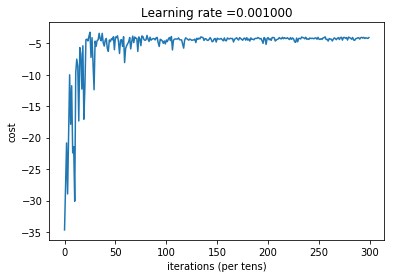

In [25]:
# Plot cost versus number of iterations
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(format(options[2], 'f')))
plt.show()

## Testing
After training our model, we have to test it using the test data set without the labels. 

In [26]:
def ml_softmax_test(w1, w2, X_test, activation):
    
    """ Finds the category in which each example belong to.
    
    :param w1: The trained (M+1) x (D+1) matrix of the parameters w1
    :param w2: The trained K x (M+1) matrix of the parameters w2
    :param X_test: The matrix with the data that will be used for testing
    :param activation: The chosen activation function
    :return:
        ttest: The (N x 1) matrix that contains the predict category of each example
    
    """
    
    a = X_test.dot(w1.T)
    z, grad_z = activations(activation, a)
    y = z.dot(w2.T)
    ytest = softmax(y)
    # Keep the position with the biggest probability, as the category a test example belongs to
    ttest = np.argmax(ytest, 1)
    
    return ttest

### Call Test Function for Train Data Set

In [27]:
pred = ml_softmax_test(w1, w2, X_train, activation)

### Train Accuracy

In [28]:
# Compare our predictions with the real values and compute the train accuracy of the model
np.mean( pred == np.argmax(y_train,1) )

1.0

### Call Test Function for Test Data Set

In [29]:
pred = ml_softmax_test(w1, w2, X_test, activation)

### Test Accuracy

In [30]:
# Compare our predictions with the real values and compute the test accuracy of the model
np.mean( pred == np.argmax(y_test,1) )

0.983

## Lets take a look at our test data. Check out some of the misclassified test data.

### Plot Mnist's Faults

In [31]:
def plot_mnists_faults():
    
    """ Plot 25 random misclassified images from the Mnist training set. """  

    
    faults = np.where(np.not_equal(np.argmax(y_test,1),pred))[0]

    # plot 25 misclassified examples from the test set
    n = 25
    samples = np.random.choice(faults, n)
    sqrt_n = int( n ** 0.5 )

    plt.figure( figsize=(11,13) )

    cnt = 0
    for i in samples:
        cnt += 1
        plt.subplot( sqrt_n, sqrt_n, cnt )
        plt.subplot( sqrt_n, sqrt_n, cnt ).axis('off')
        plt.imshow( X_test[i,1:].reshape(28,28)*255, cmap='gray' )
        plt.title("True: "+str(np.argmax(y_test,1)[i])+ "\n Predicted: "+ str(pred[i]))

    plt.show()

### Plot Cifar-10 Faults

In [32]:
def plot_cifar_faults():
    
    """ Plot 25 random misclassified images from the Cifar-10 training set. """  
    
    faults = np.where(np.not_equal(np.argmax(y_test,1),pred))[0]

    n = 25
    sqrt_n = int( n**0.5 )
    samples = np.random.choice(faults, n)

    plt.figure( figsize=(15,15) )

    cnt = 0
    for i in samples:
        arr = X_test[i, 1:] * 255
        R = arr[0:1024].reshape(32,32)/255.0
        G = arr[1024:2048].reshape(32,32)/255.0
        B = arr[2048:].reshape(32,32)/255.0

        img = np.dstack((R,G,B))
        cnt += 1
        plt.subplot( sqrt_n, sqrt_n, cnt )
        plt.subplot( sqrt_n, sqrt_n, cnt ).axis('off')
        plt.imshow(img,interpolation='bicubic')
        plt.title("True: "+str(np.argmax(y_test,1)[i])+ "\n Predicted: "+ str(pred[i]))

    plt.show()

### View Misclassified Data

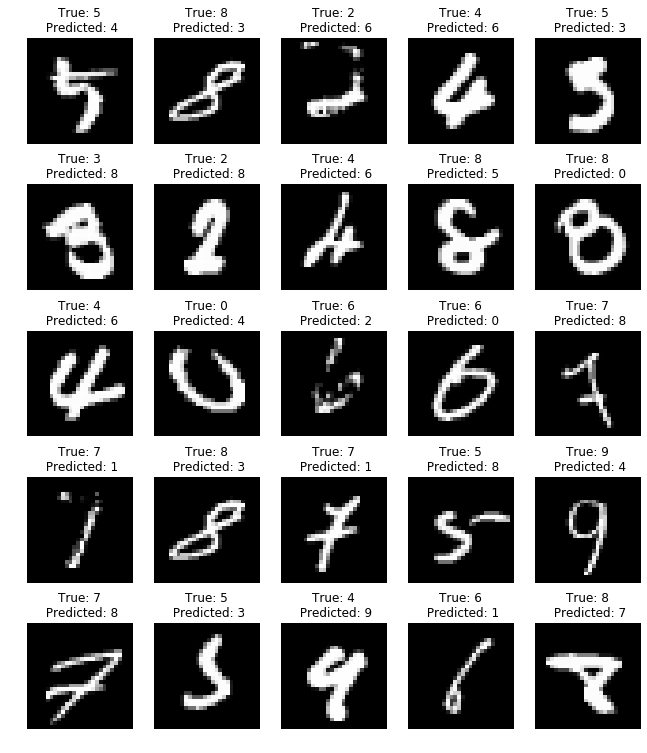

In [33]:
if(data_set == 1):
    plot_mnists_faults()
elif(data_set == 2):
    plot_cifar_faults()

# Fine-Tuning & Results

## 1. MNIST Data Set

<table style="width:100%">
    <tr>
        <th> <center> <font size="3">Activation Function</font></center></th>
        <th> <center><font size="3">Hidden Units</font><center></th>
        <th> <center><font size="3">Iterations</font></center></th>
        <th> <center><font size="3">Learning Rate</font></center></th>
        <th> <center><font size="3">lamda</font></center></th>
        <th> <center><font size="3">Accuracy</font></center></th>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">100</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9797</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><i><b><center><font size="2.85">$ 10^{-3} $</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9816</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">700</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9802</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-4} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9769</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">1000</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-4} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9065</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9313</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9827</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9834</font></center></b></i></td>
    </tr>  
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9794</font></center></b></i></td>
    </tr> 
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">100</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9749</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9746</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9734</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">700</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9777</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-4} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9724</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">350</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.7865</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9597</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9508</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9421</font></center></b></i></td>
    </tr>  
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9288</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">100</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9828</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><i><b><center><font size="2.85">$ 10^{-3} $</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9604</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9763</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">700</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9813</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-4} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9809</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">1000</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-4} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.9821</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.4604</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9817</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9822</font></center></b></i></td>
    </tr>  
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.9798</font></center></b></i></td>
    </tr>
</table>

In Mnist data set our model achieved an accuracy over 97% in most cases. 

## 2. CIFAR-10 Data Set

<table style="width:100%">
    <tr>
        <th> <center> <font size="3">Activation Function</font></center></th>
        <th> <center><font size="3">Hidden Units</font><center></th>
        <th> <center><font size="3">Iterations</font></center></th>
        <th> <center><font size="3">Learning Rate</font></center></th>
        <th> <center><font size="3">lamda</font></center></th>
        <th> <center><font size="3">Accuracy</font></center></th>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">100</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.487</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><i><b><center><font size="2.85">$ 10^{-3} $</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.4843</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">700</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.4788</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">1000</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.4861</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.4644</font></center></b></i></td>
    </tr> 
    <tr>
        <td><i><b><center><font size="2">tan</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.4761</font></center></b></i></td>
    </tr> 
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">100</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.478</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.4965</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">700</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.5141</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-4} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.4758</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.1435</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.1104</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.1242</font></center></b></i></td>
    </tr>  
    <tr>
        <td><i><b><center><font size="2">log</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.1</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">100</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.1152</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><i><b><center><font size="2.85">$ 10^{-3} $</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.1221</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.1352</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">700</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.1267</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">300</font></center></b></i></td>
        <td><i><b><center><font size="2">1000</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.1207</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-1} $</font></center></td>
        <td><i><b><center><font size="2">0.10156</font></center></b></i></td>
    </tr>
    <tr>
        <td><i><b><center><font size="2">cos</font></center></b></i></td>
        <td><i><b><center><font size="2">200</font></center></b></i></td>
        <td><i><b><center><font size="2">500</font></center></b></i></td>
        <td><center><font size="2.85">$ 10^{-3} $</font></center></td>
        <td><center><font size="2.85">$ 10^{-2} $</font></center></td>
        <td><i><b><center><font size="2">0.1</font></center></b></i></td>
    </tr>  
</table>

The accuracy of the model on Cifar-10 is extremely low, due to the complexity of the data set and especially in case of changing the learning rate parameter. In contrast to Mnist data set, Cifar-10 has fewer training examples and much more feautures (colour images), so their score difference is completely justified. In order to enhance the performance of the model, we could add a second hidden layer. The cosine activation function is the least effective one and it is not suggested. 